The purpose of the case study is to classify a given silhouette as one of four different types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus,
van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from
the silhouette. The vehicle may be viewed from one of many different angles.
 


 
The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully
which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension 
(which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) 
and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [200]:
import numpy as np
import pandas as pd

In [201]:
 data= pd.read_csv('vehicle.csv')
vehicle = pd.DataFrame(data)
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [202]:
vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [203]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [204]:
vehicle = vehicle.replace('?', np.nan)

In [205]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [206]:
vehicle= vehicle.dropna()

In [207]:
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [208]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

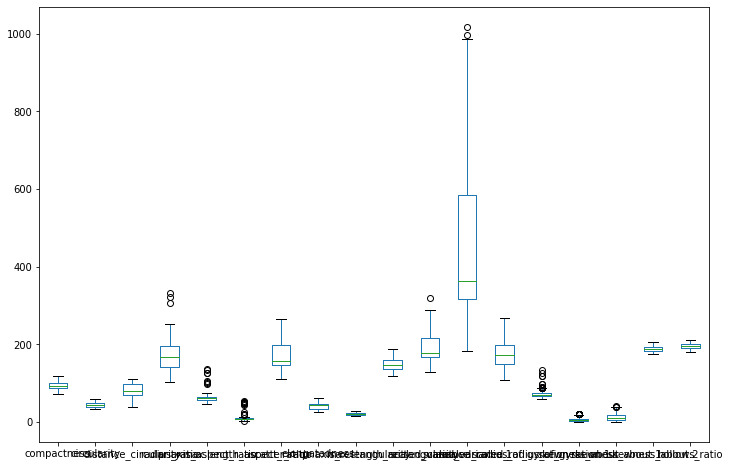

In [209]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#sns.boxplot(vehicle, figsize= (20,20))

vehicle.plot(kind='box', figsize=(12,8))
plt.show()

#vehicle.boxplot(return_type='axes', figsize=(12,8))


In [210]:
vehicle.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689885              0.789955   
circularity                     0.689885     1.000000              0.797704   
distance_circularity            0.789955     0.797704              1.000000   
radius_ratio                    0.688130     0.623950              0.771404   
pr.axis_aspect_ratio            0.090557     0.155023              0.163386   
max.length_aspect_ratio         0.150369     0.251619              0.265591   
scatter_ratio                   0.814026     0.858149              0.909023   
elongatedness                  -0.788051    -0.825108             -0.912713   
pr.axis_rectangularity          0.814227     0.856137              0.897261   
max.length_rectangularity       0.674902     0.965366              0.773459   
scaled_variance                 0.764386     0.806108              0.865683   
scaled_variance.1               0.820240     0.850932              0.891789   
scaled_radius_of_gyration       0.581405     0.935594              0.705689   
scaled_radius_of_gyration.1    -0.258437     0.049070             -0.238145   
skewness_about                  0.231648     0.141726              0.110280   
skewness_about.1                0.168384    -0.001975              0.277851   
skewness_about.2                0.296195    -0.113902              0.145258   
hollows_ratio                   0.372806     0.049331              0.343228   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.688130              0.090557   
circularity                      0.623950              0.155023   
distance_circularity             0.771404              0.163386   
radius_ratio                     1.000000              0.667375   
pr.axis_aspect_ratio             0.667375              1.000000   
max.length_aspect_ratio          0.452460              0.652093   
scatter_ratio                    0.743470              0.113696   
elongatedness                   -0.795761             -0.191193   
pr.axis_rectangularity           0.716210              0.086992   
max.length_rectangularity        0.570478              0.133553   
scaled_variance                  0.806788              0.290375   
scaled_variance.1                0.731773              0.100668   
scaled_radius_of_gyration        0.544636              0.135663   
scaled_radius_of_gyration.1     -0.175348              0.173060   
skewness_about                   0.044693             -0.059244   
skewness_about.1                 0.178079             -0.040769   
skewness_about.2                 0.375591              0.229702   
hollows_ratio                    0.470895              0.257566   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.150369       0.814026   
circularity                                 0.251619       0.858149   
distance_circularity                        0.265591       0.909023   
radius_ratio                                0.452460       0.743470   
pr.axis_aspect_ratio                        0.652093       0.113696   
max.length_aspect_ratio                     1.000000       0.171445   
scatter_ratio                               0.171445       1.000000   
elongatedness                              -0.183242      -0.973413   
pr.axis_rectangularity                      0.167514       0.991992   
max.length_rectangularity                   0.309180       0.808154   
scaled_variance                             0.331124       0.950067   
scaled_variance.1                           0.150069       0.996396   
scaled_radius_of_gyration                   0.197179       0.795748   
scaled_radius_of_gyration.1                 0.308329      -0.045632   
skewness_about                              0.016461       0.070118   
skewness_about.1                            0.041210       0.227375   
skewness_about.2                           -0.

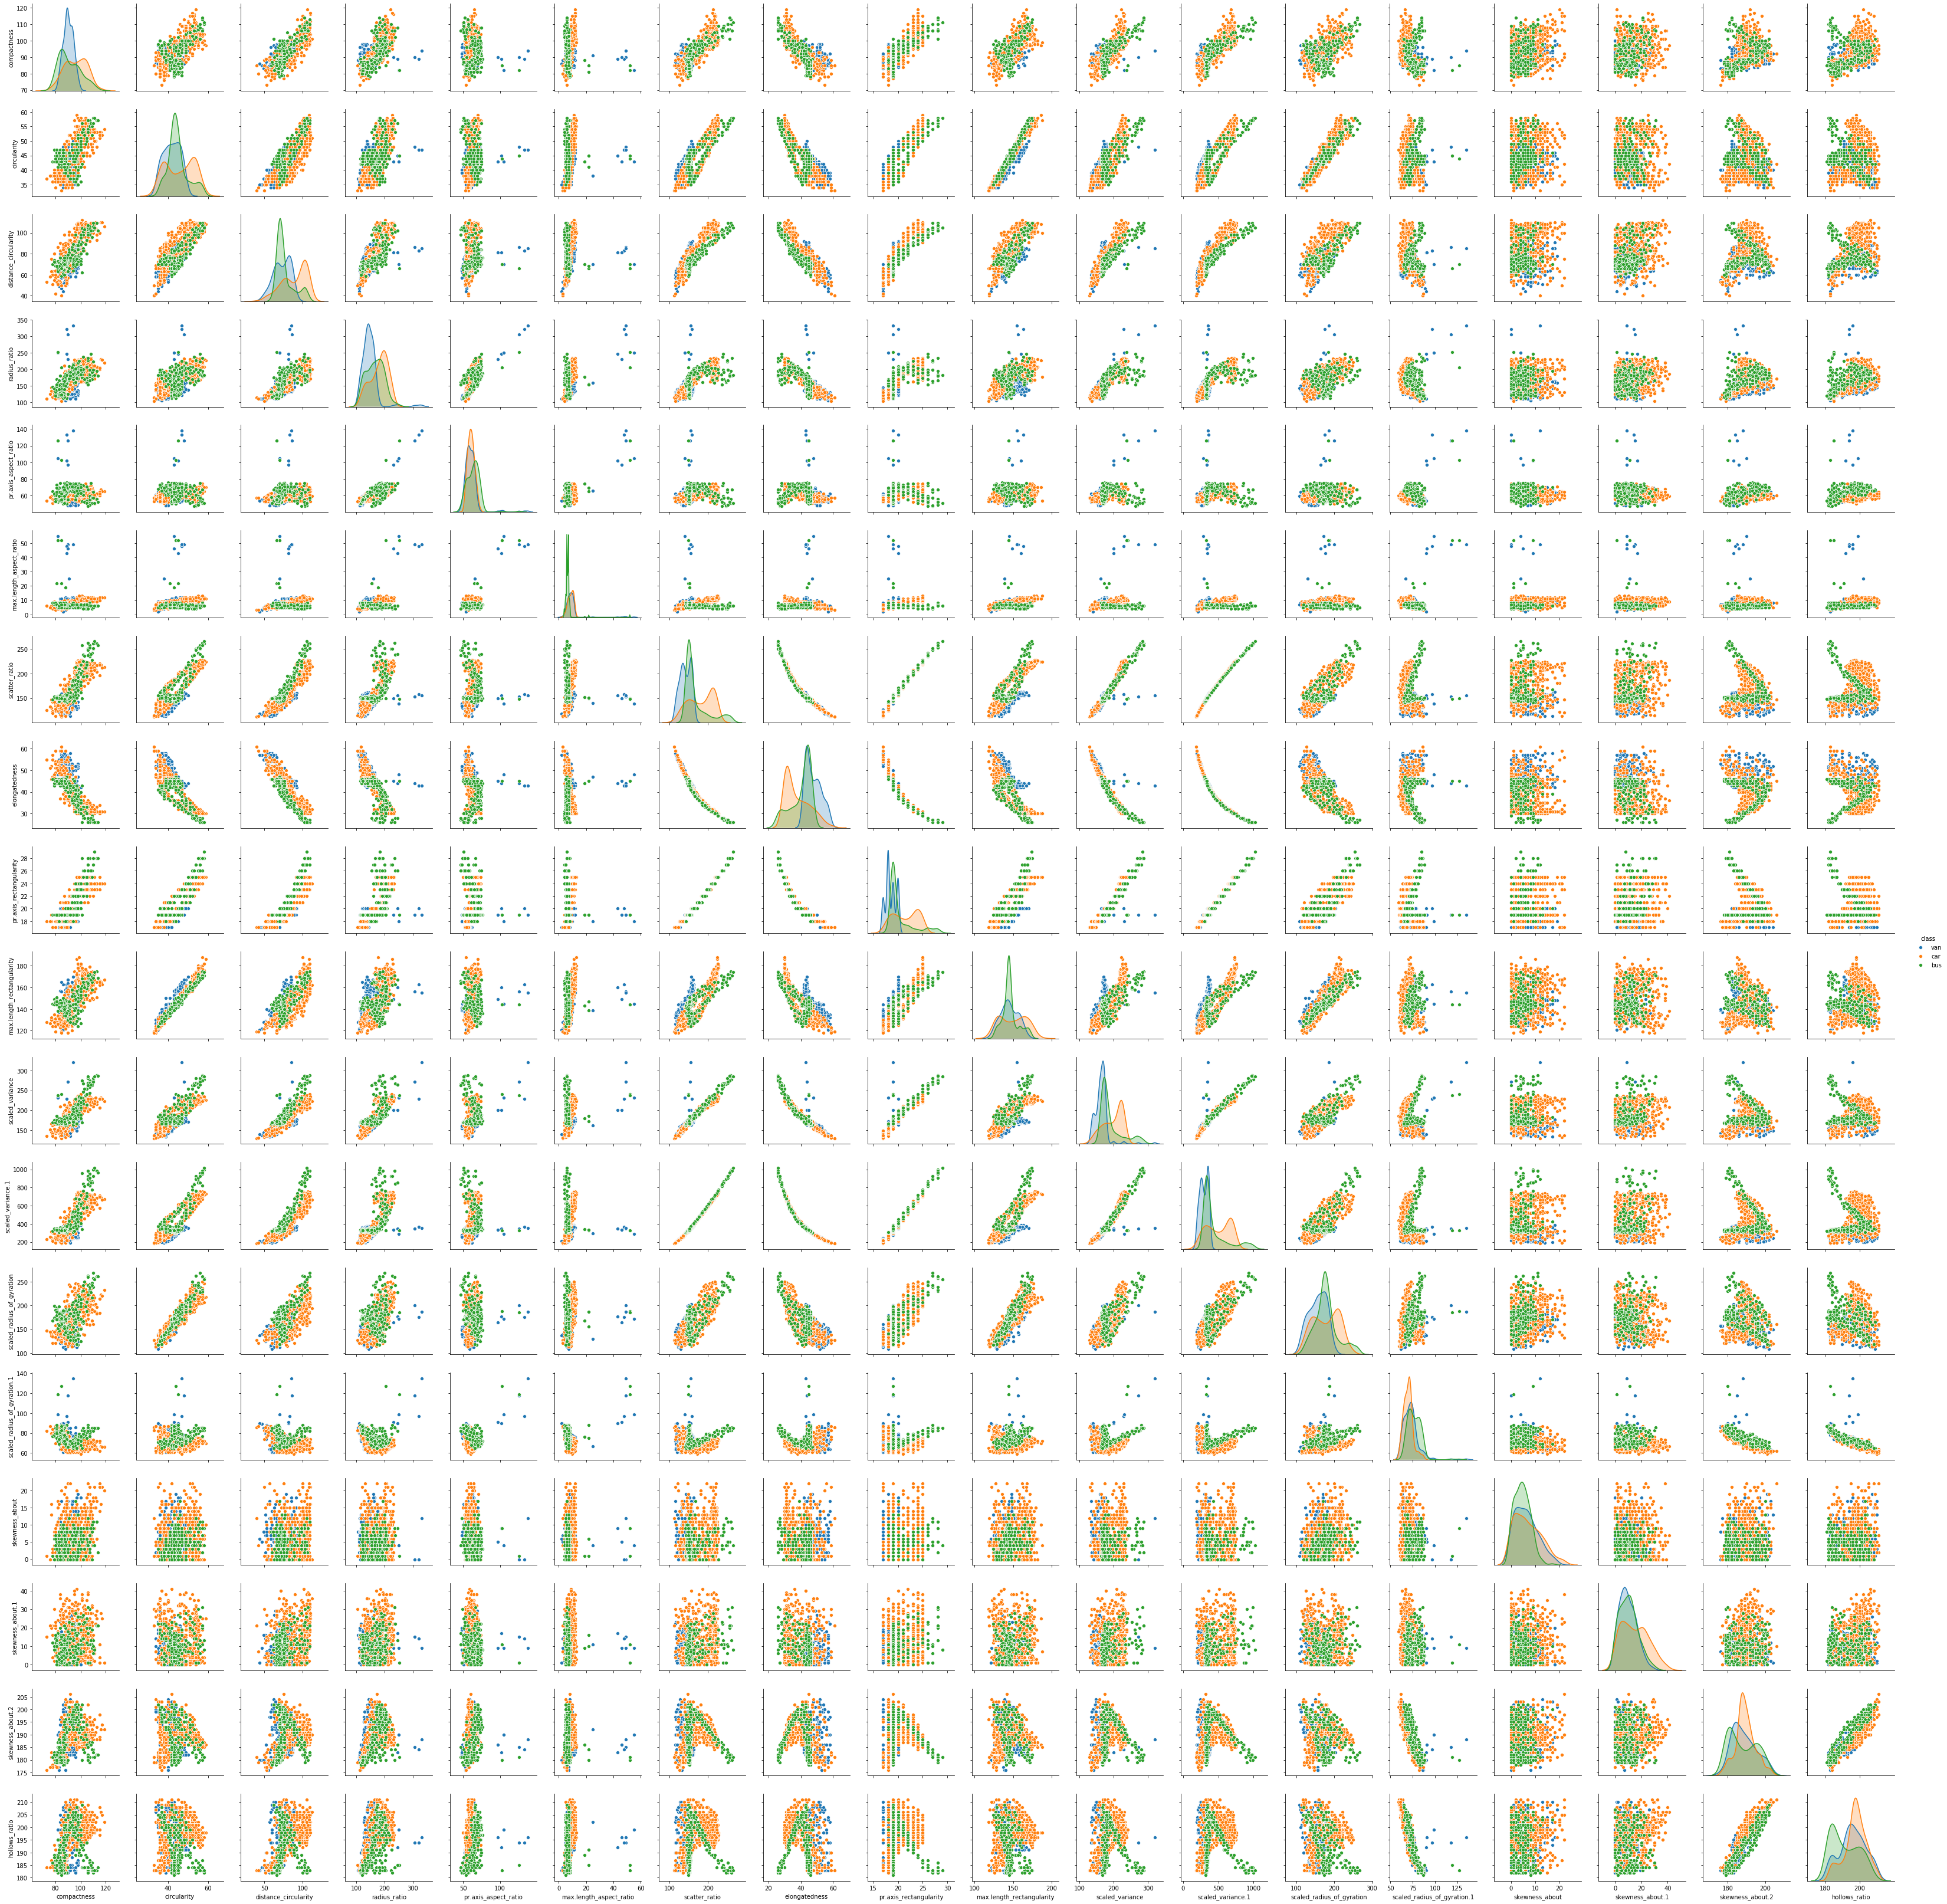

In [211]:
sns.pairplot(vehicle, diag_kind='kde' , hue = 'class')

In [212]:
vehicle.groupby(["class"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            205          205                   205           205   
car            413          413                   413           413   
van            195          195                   195           195   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     205                      205            205   
car                     413                      413            413   
van                     195                      195            195   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              205                     205                        205   
car              413                     413                        413   
van              195                     195                        195   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                205                205                        205   
car                413                413                        413   
van                195                195                        195   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            205             205               205   
car                            413             413               413   
van                            195             195               195   

       skewness_about.2  hollows_ratio  
class                                   
bus                 205            205  
car                 413            413  
van                 195            195

In [213]:
Q1=vehicle.quantile(0.25)
Q3=vehicle.quantile(0.75)
IQR=Q3-Q1
print(IQR)

compactness                     13.0
circularity                      9.0
distance_circularity            28.0
radius_ratio                    54.0
pr.axis_aspect_ratio             8.0
max.length_aspect_ratio          3.0
scatter_ratio                   52.0
elongatedness                   13.0
pr.axis_rectangularity           4.0
max.length_rectangularity       22.0
scaled_variance                 50.0
scaled_variance.1              268.0
scaled_radius_of_gyration       49.0
scaled_radius_of_gyration.1      8.0
skewness_about                   7.0
skewness_about.1                13.0
skewness_about.2                 9.0
hollows_ratio                   10.0
dtype: float64


In [214]:
min_cap=Q1-(1.5*IQR)
max_cap=Q3+(1.5*IQR)
print(min_cap)
print('/n')
print(max_cap)

compactness                     67.5
circularity                     26.5
distance_circularity            28.0
radius_ratio                    60.0
pr.axis_aspect_ratio            45.0
max.length_aspect_ratio          2.5
scatter_ratio                   68.0
elongatedness                   13.5
pr.axis_rectangularity          13.0
max.length_rectangularity      104.0
scaled_variance                 92.0
scaled_variance.1              -84.0
scaled_radius_of_gyration       75.5
scaled_radius_of_gyration.1     55.0
skewness_about                  -8.5
skewness_about.1               -13.5
skewness_about.2               170.5
hollows_ratio                  176.0
dtype: float64
/n
compactness                    119.5
circularity                     62.5
distance_circularity           140.0
radius_ratio                   276.0
pr.axis_aspect_ratio            77.0
max.length_aspect_ratio         14.5
scatter_ratio                  276.0
elongatedness                   65.5
pr.axis_rectangulari

In [215]:
((vehicle < (Q1 - 1.5 * IQR)) | (vehicle > (Q3 + 1.5 * IQR))).sum()


circularity                     0
class                           0
compactness                     0
distance_circularity            0
elongatedness                   0
hollows_ratio                   0
max.length_aspect_ratio        13
max.length_rectangularity       0
pr.axis_aspect_ratio            8
pr.axis_rectangularity          0
radius_ratio                    3
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1    15
scaled_variance                 1
scaled_variance.1               2
scatter_ratio                   0
skewness_about                 12
skewness_about.1                3
skewness_about.2                0
dtype: int64

In [219]:
vehicle = vehicle[~((vehicle < (Q1 - 1.5 * IQR)) |(vehicle > (Q3 + 1.5 * IQR))).any(axis=1)]

In [220]:
((vehicle < (Q1 - 1.5 * IQR)) | (vehicle > (Q3 + 1.5 * IQR))).sum()

circularity                    0
class                          0
compactness                    0
distance_circularity           0
elongatedness                  0
hollows_ratio                  0
max.length_aspect_ratio        0
max.length_rectangularity      0
pr.axis_aspect_ratio           0
pr.axis_rectangularity         0
radius_ratio                   0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
scaled_variance                0
scaled_variance.1              0
scatter_ratio                  0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
dtype: int64

In [ ]:
#from scipy import stats
#X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]


In [ ]:
#X[np.abs(X-X.mean()) <= (3*X.std())]
#all outliers replace by Nan value

In [ ]:
#X = X.replace('NaN', np.mean)
#replace NaN value with mean value

In [290]:
#X[(np.abs(X-X.mean()) > (3*X.std()))]
#this is values of outliers, rest are NaN

In [221]:
#vehicle['max.length_aspect_ratio']=vehicle['max.length_aspect_ratio'].apply(np.log)
#vehicle['pr.axis_aspect_ratio ']=vehicle['pr.axis_aspect_ratio'].apply(np.log)
#vehicle['radius_ratio']=vehicle['radius_ratio'].apply(np.log)
#vehicle['scaled_radius_of_gyration.1']=vehicle['scaled_radius_of_gyration.1'].apply(np.log)
#vehicle['scaled_variance']=vehicle['scaled_variance'].apply(np.log)
#vehicle['skewness_about']=vehicle['skewness_about'].apply(np.log)
#vehicle['skewness_about.1']=vehicle['skewness_about.1'].apply(np.sqrt)
#vehicle['scaled_variance.1']=vehicle['scaled_variance.1'].apply(np.log)

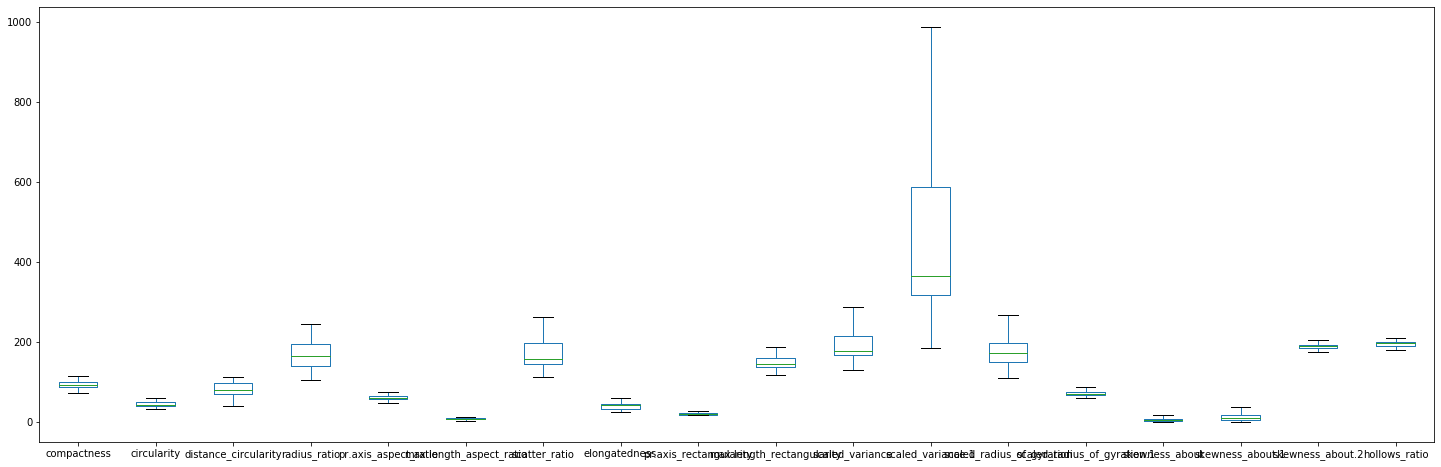

In [222]:
vehicle.plot(kind='box', figsize=(25,8))
plt.show()

outliers have removed

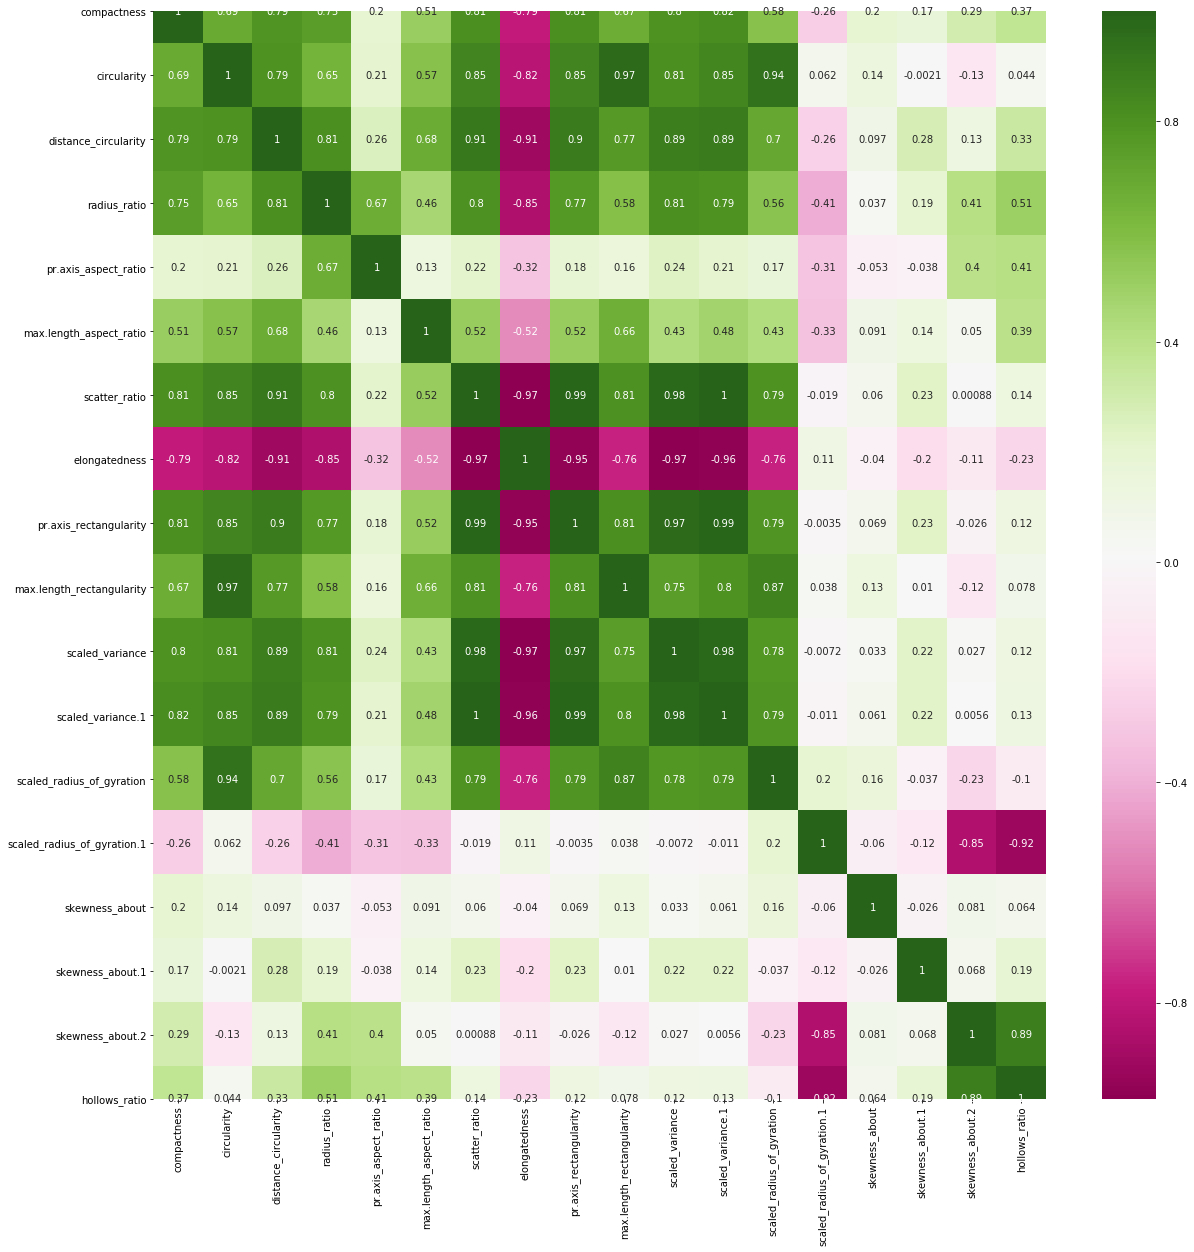

In [226]:
fig = plt.subplots(figsize=(20,20))
sns.heatmap(vehicle.corr(),annot=True,cbar=True, cmap="PiYG")

In [227]:
vehicle.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685365              0.786493   
circularity                     0.685365     1.000000              0.792317   
distance_circularity            0.786493     0.792317              1.000000   
radius_ratio                    0.745812     0.645237              0.814577   
pr.axis_aspect_ratio            0.204677     0.209918              0.256946   
max.length_aspect_ratio         0.511625     0.571952              0.680194   
scatter_ratio                   0.811837     0.854895              0.909663   
elongatedness                  -0.787336    -0.819802             -0.909983   
pr.axis_rectangularity          0.811860     0.854214              0.899313   
max.length_rectangularity       0.672916     0.965461              0.766940   
scaled_variance                 0.795378     0.814334              0.889968   
scaled_variance.1               0.818834     0.848664              0.894271   
scaled_radius_of_gyration       0.575283     0.935697              0.703468   
scaled_radius_of_gyration.1    -0.264927     0.062077             -0.255515   
skewness_about                  0.197233     0.138467              0.096821   
skewness_about.1                0.169217    -0.002138              0.276915   
skewness_about.2                0.292460    -0.126110              0.127771   
hollows_ratio                   0.370680     0.043799              0.332735   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.745812              0.204677   
circularity                      0.645237              0.209918   
distance_circularity             0.814577              0.256946   
radius_ratio                     1.000000              0.673173   
pr.axis_aspect_ratio             0.673173              1.000000   
max.length_aspect_ratio          0.463409              0.134158   
scatter_ratio                    0.801094              0.218937   
elongatedness                   -0.852406             -0.318672   
pr.axis_rectangularity           0.774101              0.184998   
max.length_rectangularity        0.578283              0.156110   
scaled_variance                  0.807661              0.237888   
scaled_variance.1                0.792969              0.208318   
scaled_radius_of_gyration        0.560871              0.173236   
scaled_radius_of_gyration.1     -0.406689             -0.313020   
skewness_about                   0.036959             -0.053458   
skewness_about.1                 0.191568             -0.037744   
skewness_about.2                 0.412381              0.398191   
hollows_ratio                    0.505875              0.413461   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.511625       0.811837   
circularity                                 0.571952       0.854895   
distance_circularity                        0.680194       0.909663   
radius_ratio                                0.463409       0.801094   
pr.axis_aspect_ratio                        0.134158       0.218937   
max.length_aspect_ratio                     1.000000       0.516926   
scatter_ratio                               0.516926       1.000000   
elongatedness                              -0.516345      -0.974287   
pr.axis_rectangularity                      0.519482       0.991821   
max.length_rectangularity                   0.661602       0.805913   
scaled_variance                             0.434590       0.980698   
scaled_variance.1                           0.482639       0.996606   
scaled_radius_of_gyration                   0.425455       0.791903   
scaled_radius_of_gyration.1                -0.331425      -0.019212   
skewness_about                              0.090937       0.060081   
skewness_about.1                            0.135746       0.229199   
skewness_about.2                            0.

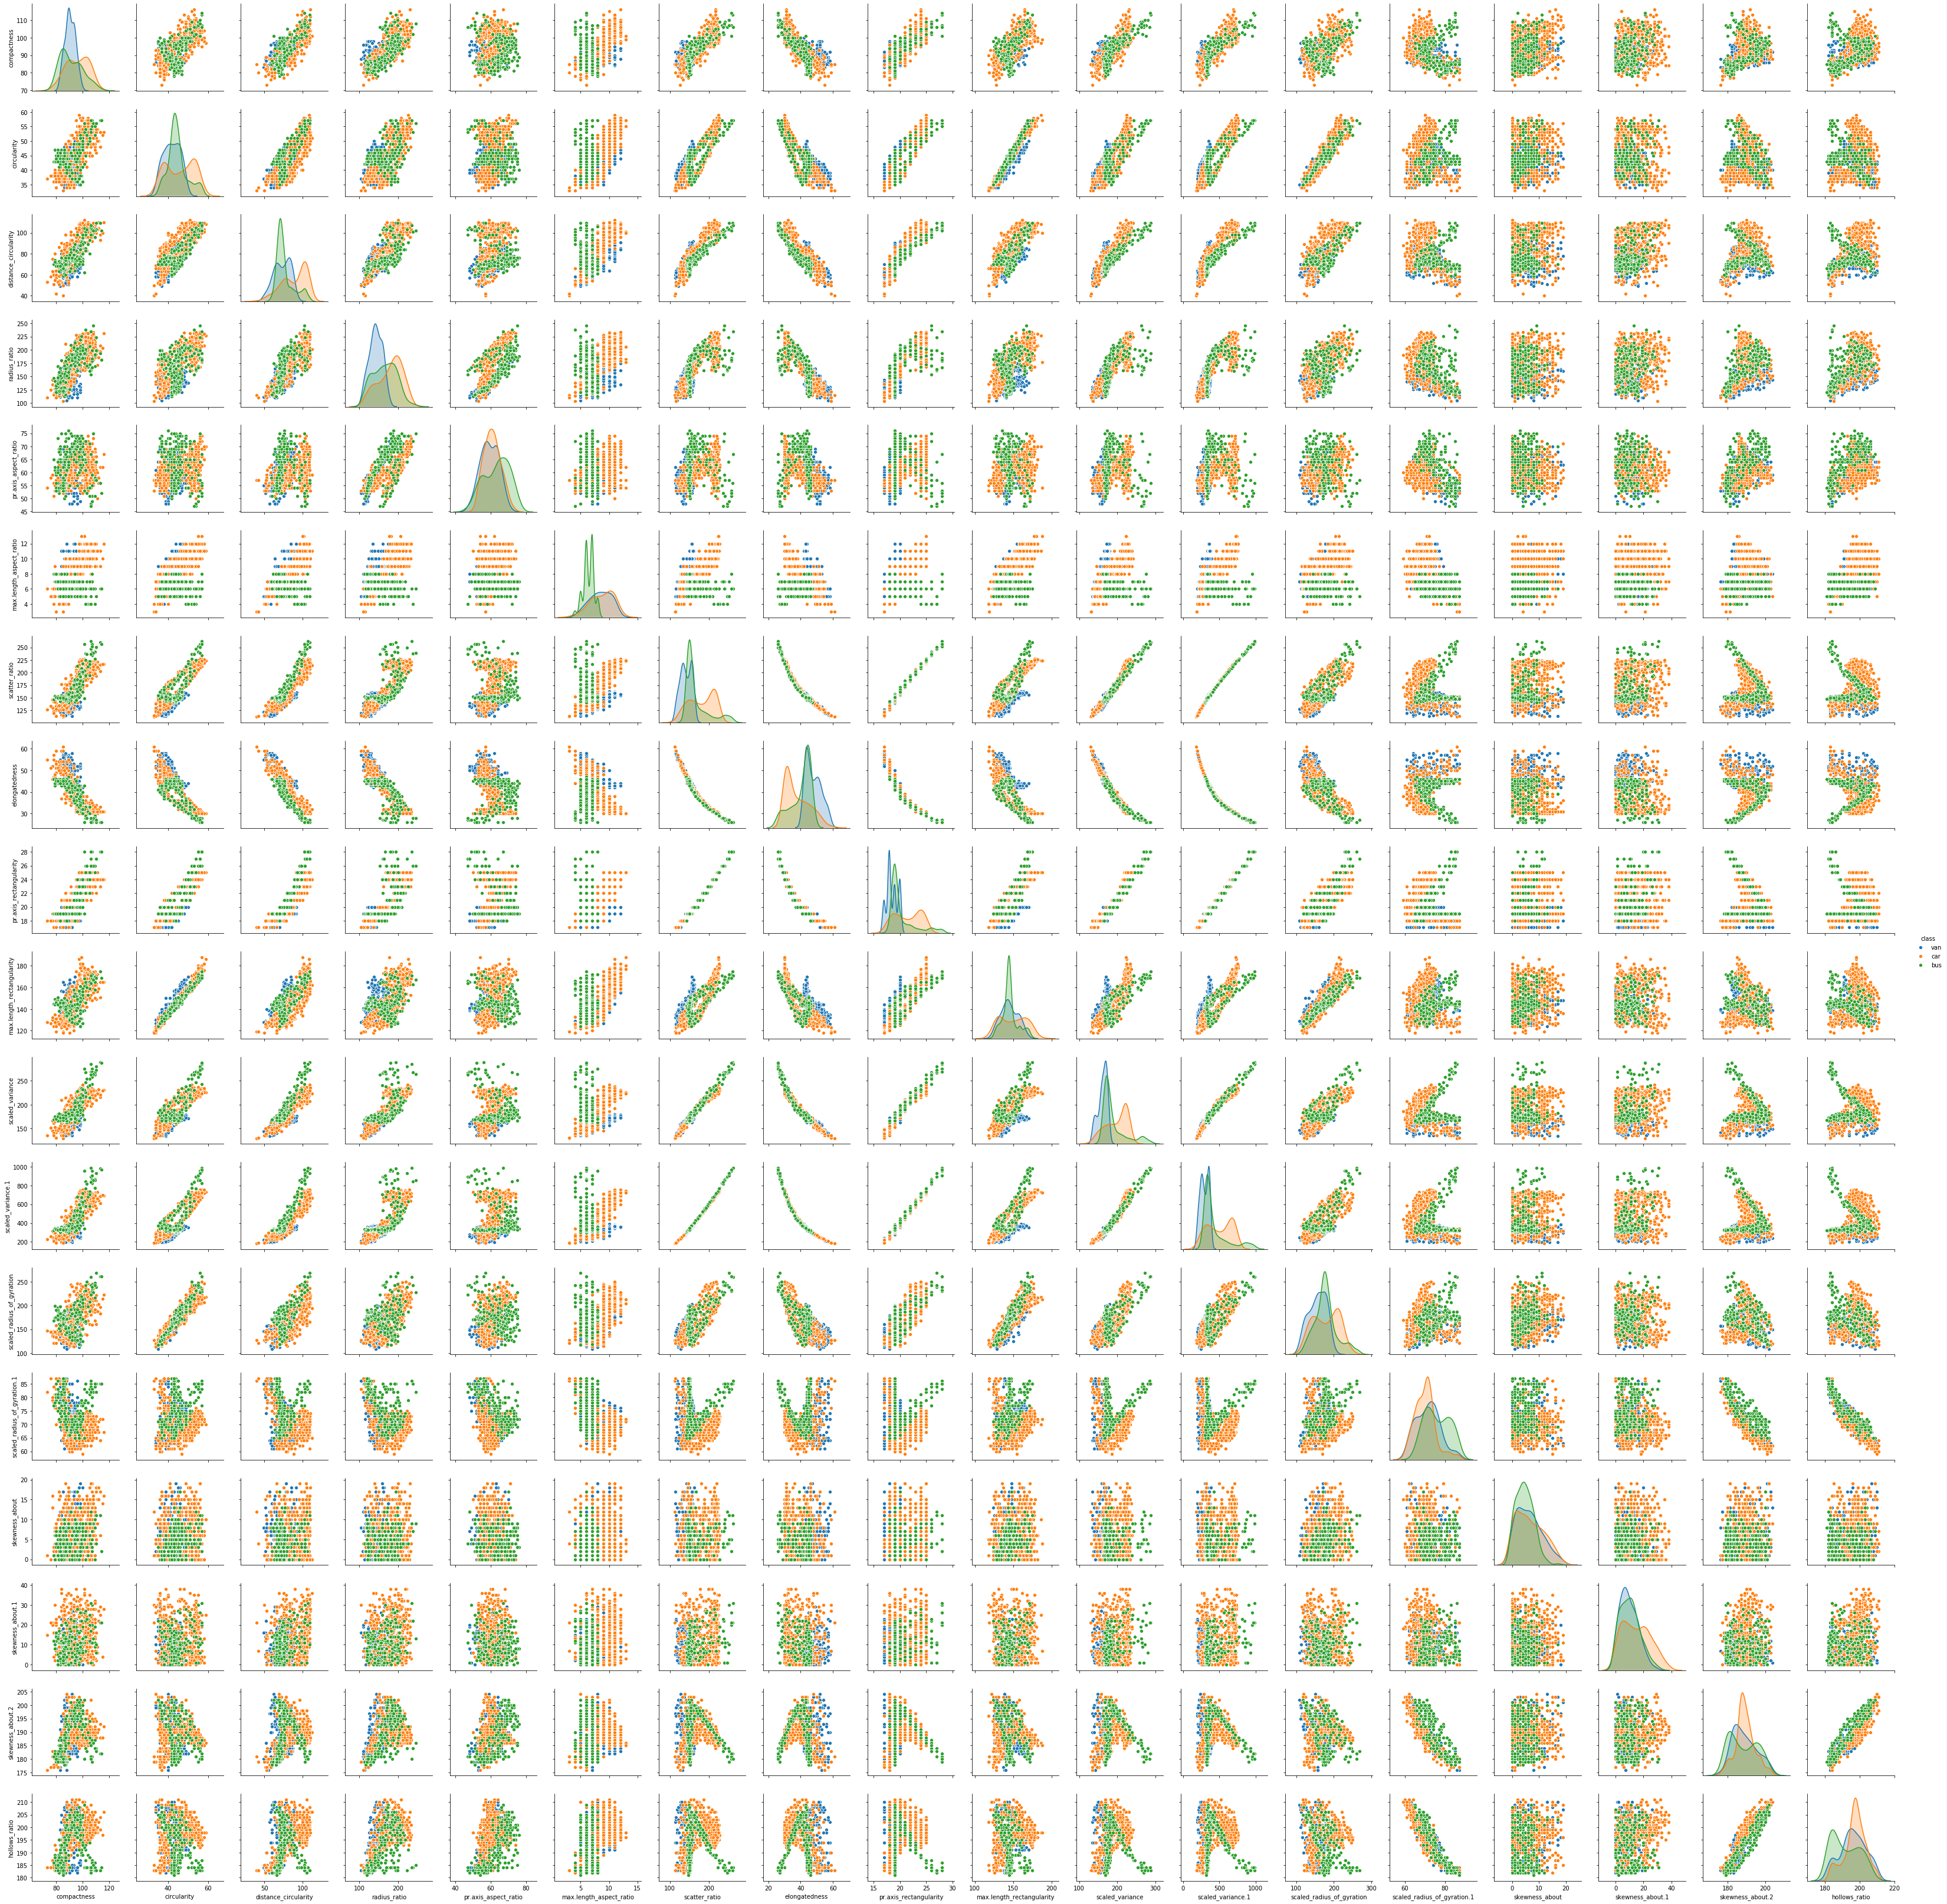

In [228]:
sns.pairplot(vehicle, diag_kind= 'kde', hue='class')

here we can see that there is less correlation between class and other attributes: compactness,pr.axis_aspect_ratio distance_circularity, max.length_rectangularity, skewness_about.1, skewness_about.2

In [249]:
#from scipy.stats import zscore

#normalize the data with zscore
#from scipy.stats import zscore 
#vehicle = vehicle.apply(zscore)
#vehicle.head()

In [236]:
remove_columns= ['compactness', 'distance_circularity', 'pr.axis_aspect_ratio', 'max.length_rectangularity', 'skewness_about.1', 'skewness_about.2','class']

In [241]:
X = vehicle.drop(remove_columns, axis=1)
y = vehicle['class']
#X,y = dataset.iloc[:, 1:].values , dataset.iloc[:,0].values

In [242]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
#split the data into train and test

In [243]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [244]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00184162  0.63913373  0.59336626  0.85371832 -0.81501743  0.8552854
   0.81266859  0.84907083  0.93742815  0.07276891  0.10725661  0.03725105]
 [ 0.63913373  1.00184162  0.48167859  0.81614649 -0.85935595  0.79243392
   0.82693535  0.8114686   0.55906005 -0.406665    0.02846469  0.5095421 ]
 [ 0.59336626  0.48167859  1.00184162  0.56344477 -0.55233573  0.56678049
   0.4831417   0.53289675  0.45259959 -0.31859005  0.0608179   0.37460901]
 [ 0.85371832  0.81614649  0.56344477  1.00184162 -0.97696856  0.99332044
   0.98186195  0.99838831  0.78600466 -0.03833029  0.03946584  0.15578694]
 [-0.81501743 -0.85935595 -0.55233573 -0.97696856  1.00184162 -0.95341895
  -0.97164624 -0.96217027 -0.75373977  0.11561049 -0.01712144 -0.23756623]
 [ 0.8552854   0.79243392  0.56678049  0.99332044 -0.95341895  1.00184162
   0.96758132  0.99373306  0.78541427 -0.02474231  0.0508897   0.13849619]
 [ 0.81266859  0.82693535  0.4831417   0.98186195 -0.97164624  0.96758132
   1.001841

In [245]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.32835341 -0.14154062 -0.12207382 -0.25957106 -0.45050946 -0.10355092
   0.08373244  0.52593437 -0.47511102 -0.24836074 -0.07161898  0.0053536 ]
 [ 0.31296635  0.22344919  0.09574962  0.2941514  -0.07768586  0.82073684
  -0.07397046  0.24572318  0.09426267  0.04423778  0.00578134  0.00762047]
 [ 0.23158262  0.19667484 -0.08729738 -0.82474687  0.39387695  0.21957069
  -0.02206724 -0.08716493  0.07095184 -0.04258353  0.02467547 -0.03112599]
 [ 0.36068722 -0.05215217  0.04260201  0.09507375  0.1885178  -0.17566867
   0.01285809  0.05025251 -0.00748705  0.15062306  0.37800765  0.78842165]
 [-0.35632178 -0.00529086 -0.07589914 -0.13898037 -0.12635836 -0.02271421
  -0.07012849  0.47131804  0.65703983 -0.34696514  0.07729782  0.21524032]
 [ 0.35756819 -0.06244563  0.02585359  0.07151625  0.20313301 -0.26209573
  -0.00913504  0.27791607  0.31395196  0.34099587 -0.67732226 -0.03968774]
 [ 0.35358655 -0.06432591  0.08812489  0.20213997  0.14008119 -0.06314077
  -0.08413158 

In [246]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


0         1         2         3         4         5         6  \
0  7.45974  2.224262  1.028634  0.662031  0.326473  0.129538  0.074242   

          7         8         9        10        11  
0  0.056594  0.036053  0.017371  0.006557  0.000605

In [247]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 62.0502275   80.55167382  89.10786278  94.6146486   97.33025803
  98.40775809  99.0253042   99.49605479  99.79594099  99.94043175
  99.99497066 100.        ]


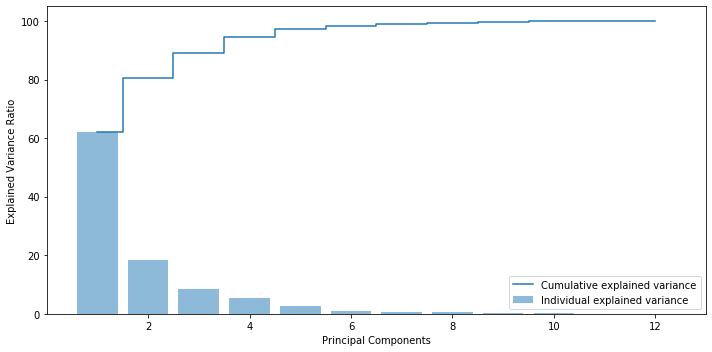

In [248]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [250]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.98)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [256]:
X_train_pca = pca.transform(X_train)
print('Total Original features:', X_train.shape[1])
print('Reduced features:', X_train_pca.shape[1])

Total Original features: 12
Reduced features: 2


In [257]:
X_test_pca = pca.transform(X_test)
print('Original number of features:', X_test.shape[1])
print('Reduced number of features:', X_test_pca.shape[1])

Original number of features: 12
Reduced number of features: 2


In [258]:
Proj_data_Train = pd.DataFrame(X_train_pca)  
Proj_data_Train = Proj_data_Train.join(y_train)

In [275]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]



P_reduce = np.array(eigvectors_sort[0:7]).transpose()   # Selecting first few eigen vectors of all 14

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

In [276]:
# complete matrix operation 
print(y_train.shape)
X_train_std.shape, P_reduce.shape, Proj_train_data.shape

(544,)


((544, 12), (12, 7), (544, 7))

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA()
model = LogisticRegression()
model.fit(Proj_train_data, y_train)
#predicted_values = model.predict(Proj_test_data)

result = model.score(Proj_test_data, y_test)
print(result)

0.8247863247863247


C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


SVC Algorithm

In [278]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



In [279]:
clf = SVC()
clf.fit(X_train_std, y_train)
print ('Train score', clf.score(X_test_std, y_test))

clf.fit(Proj_train_data, y_train)
print ('Test score', clf.score(Proj_test_data, y_test))

Train score 0.8974358974358975
Test score 0.9145299145299145


C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [280]:
from sklearn.model_selection import cross_val_score, cross_val_predict



scores = cross_val_score(clf, Proj_test_data, y_test, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.88       0.625      0.91666667 0.73913043 1.         0.82608696
 0.91304348 0.86956522 0.91304348 0.91304348] [0.88       0.625      0.91666667 0.73913043 1.         0.82608696
 0.91304348 0.86956522 0.91304348 0.91304348]
Average score: 0.8595579710144927


C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

gridsearch for SVM

In [283]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}]
gridsearch = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [284]:
gridsearch.fit(X_train_std, y_train)

C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=8,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [285]:
gridsearch.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

 by grid searching, we get C=1 and kernel =rbf, gamma='auto_deprecated' for the best fit.

In [286]:
gridsearch.best_score_

0.9301470588235294

now we will apply the hyper parameter to SVM 

In [287]:
svc = SVC(C=1, kernel='rbf')
svc.fit(X_train_std, y_train)

print("Accuracy on training set:",format(svc.score(X_train_std, y_train)))
print("Accuracy on test set:",format(svc.score(X_test_std, y_test)))

Accuracy on training set: 0.9485294117647058
Accuracy on test set: 0.8974358974358975


In [288]:
from sklearn.model_selection import cross_val_score

scoresTrain = cross_val_score(svc, X_train_std, y_train, cv=10)
print("Train Accuracy:",(scoresTrain.mean()))

Train Accuracy: 0.9299489504206486


C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

In [289]:
scoresTest = cross_val_score(svc, X_test_std, y_test, cv=10)
print("Test Accuracy:",(scoresTest.mean()))

Test Accuracy: 0.8842246376811593


C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\AMIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 